# Convert dataset's npy files into png images

---

In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

---

In [2]:
def get_channel(vector_2d, min_value, max_value):
    """
    Returns a channel with values between [0, 255] of the same shape as the input vector_2d (usually 256x256).
    
    Arguments:
        vector_2d: (256,256) float vector; temperature ranging from [min_value, max_value].
        min_value: integer, the minimum value of the entire distribution of the given vector_2d
        max_value: integer, the maximum value of the entire distribution of the given vector_2d
    """
    norm_img = (vector_2d - min_value) / (max_value - min_value)
    
    norm_img[norm_img < 0] = 0   # clip negative numbers
    norm_img[norm_img > 1] = 1   # clip numbers over 1.0
    
    return (norm_img * 255).astype(np.uint8)

In [3]:
def get_2d_vector(channel_vector, min_value, max_value):
    """
    Returns a (256,256) float vector ranging from [min_value, max_value].
    
    Arguments:
        channel_vector: a channel with values between [0, 255] 
                        extracted from the red channel of a PIL Image.
        min_value: integer, the minimum value of the entire distribution of the vector to return
        max_value: integer, the maximum value of the entire distribution of the vector to return
    """
    return channel_vector / 256 * (max_value - min_value) + min_value

---

In [62]:
def get_rgb_images(lowres_sample, hires_sample, one_channel_only=None):
    """
    Returns a PIL Image with green and blue channel all 0 and red channel temperature
    
    Arguments:
        lowres_sample: (15, 256, 256)
        hires_sample: (1, 256, 256)
        
    Returns:
        (PIL Image, PIL Image) : (lowres rgb image, hires rgb image)
    """
    lowres_rgb_channels = np.zeros((256,256,3)).astype(np.uint8)
    hires_rgb_channels  = np.zeros((256,256,3)).astype(np.uint8)

    wind_x_channel = get_channel(lowres_sample[13,:,:], -35, 40)
    wind_y_channel = get_channel(lowres_sample[14,:,:], -35, 40)
    
    lowres_rgb_channels[:,:,0] = get_channel(lowres_sample[5,:,:], -50, 50)
    lowres_rgb_channels[:,:,1] = wind_x_channel
    lowres_rgb_channels[:,:,2] = wind_y_channel
    
    hires_rgb_channels[:,:,0] = get_channel(hires_sample[0,:,:], -50, 50)
    hires_rgb_channels[:,:,1] = 0
    hires_rgb_channels[:,:,2] = 0
    
    if one_channel_only is not None:
        if one_channel_only == 0:
            lowres_rgb_channels[:,:,1] = 0
            lowres_rgb_channels[:,:,2] = 0
            hires_rgb_channels[:,:,1]  = 0
            hires_rgb_channels[:,:,2]  = 0
        if one_channel_only == 1:
            lowres_rgb_channels[:,:,0] = 0
            lowres_rgb_channels[:,:,2] = 0
            hires_rgb_channels[:,:,0]  = 0
            hires_rgb_channels[:,:,2]  = 0
        if one_channel_only == 2:
            lowres_rgb_channels[:,:,0] = 0
            lowres_rgb_channels[:,:,1] = 0
            hires_rgb_channels[:,:,0]  = 0
            hires_rgb_channels[:,:,1]  = 0
    
    return Image.fromarray(lowres_rgb_channels), Image.fromarray(hires_rgb_channels)

In [5]:
def get_temperature_from_rgb_image(pil_image):
    """
    Returns a 2d vector (256,256) of temperature value [-50, 50] extracted from the red channel of given image
    
    Arguments:
        pil_image: the PIL Image to extract the red channel from
    """
    img_channels = np.array(pil_image)
    return get_2d_vector(img_channels[:,:,0], -50, 50)

---

In [6]:
def show_images(img1, img2):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
    ax1.imshow(img1)
    #ax1.set_title('Temperature')

    ax2.imshow(img2)
    #ax2.set_title('Red channel Temperature')

    plt.show()

---

## Load some hires data

In [7]:
hires_training_0 = np.load('../data/label_training_0000_0099.npy')

## Build rgb image from temperature data

In [8]:
# temperature from first hires entry
hires_training_0[0,0,:,:]

array([[ 9.934269 , 10.239933 , 10.230167 , ...,  4.123722 ,  3.146183 ,
         1.7604408],
       [ 9.555363 ,  9.337589 ,  9.319035 , ...,  5.177433 ,  4.007511 ,
         1.9870033],
       [10.261417 ,  9.7946205,  9.606144 , ...,  4.512394 ,  3.8121986,
         2.1198158],
       ...,
       [23.974308 , 24.227238 , 22.372746 , ...,  9.2164955,  8.698917 ,
         8.552433 ],
       [22.748722 , 22.32294  , 22.906925 , ...,  8.931339 ,  8.689152 ,
         8.534855 ],
       [23.82587  , 22.086613 , 22.70673  , ...,  8.754581 ,  8.649113 ,
         8.534855 ]], dtype=float32)

In [9]:
rgb_image = get_rgb_image_from_temperature(hires_training_0[0,0,:,:])

In [10]:
rgb_image.save("hires_rgb_image.png", "PNG")

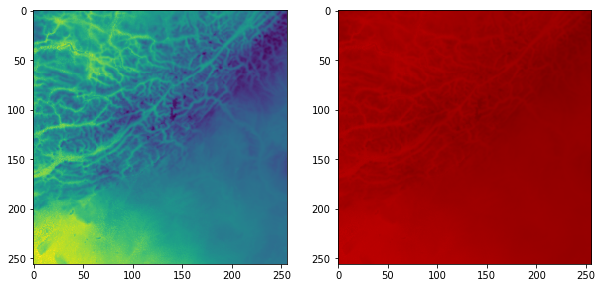

In [44]:
show_images(hires_training_0[0,0,:,:], rgb_image)

## Retrieve temperature from rgb image

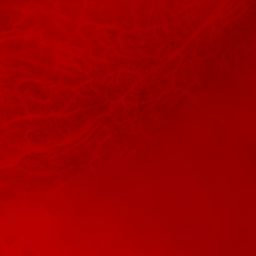

In [12]:
loaded_rgb_image = Image.open("hires_rgb_image.png")
loaded_rgb_image

In [13]:
temperature = get_temperature_from_rgb_image(loaded_rgb_image)
temperature

array([[ 9.375   ,  9.765625,  9.765625, ...,  3.90625 ,  2.734375,
         1.171875],
       [ 8.984375,  8.984375,  8.984375, ...,  4.6875  ,  3.515625,
         1.5625  ],
       [ 9.765625,  9.375   ,  8.984375, ...,  4.296875,  3.515625,
         1.5625  ],
       ...,
       [23.4375  , 23.828125, 21.875   , ...,  8.984375,  8.203125,
         8.203125],
       [22.265625, 21.875   , 22.265625, ...,  8.59375 ,  8.203125,
         8.203125],
       [23.4375  , 21.484375, 22.265625, ...,  8.203125,  8.203125,
         8.203125]])

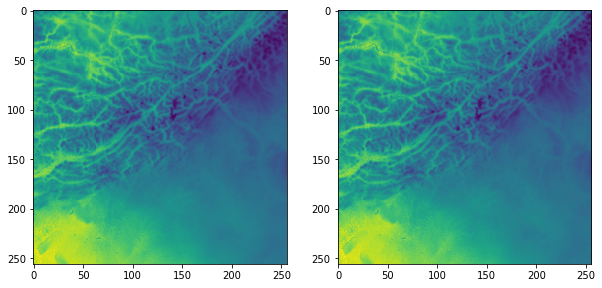

In [14]:
show_images(hires_training_0[0,0,:,:], temperature)

---

## Display the first lowres image

In [18]:
lowres_training_0 = np.load('../data/input_training_0000_0099.npy')
hires_training_0 = np.load('../data/label_training_0000_0099.npy')

### 3 Layers
- red -> temperature
- green -> wind X-axis
- blue -> wind Y-axis

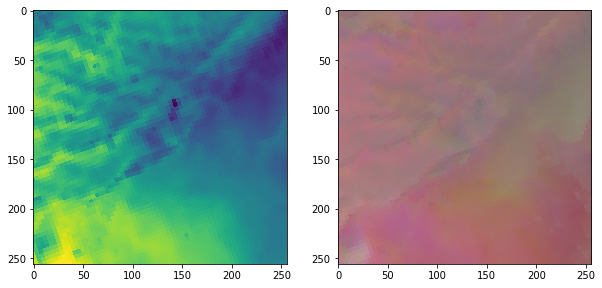

In [32]:
lowres, hires = get_rgb_images(lowres_training_0[0], hires_training_0[0])

show_images(
    lowres_training_0[0,5,:,:], 
    lowres
)

### Temperature layer

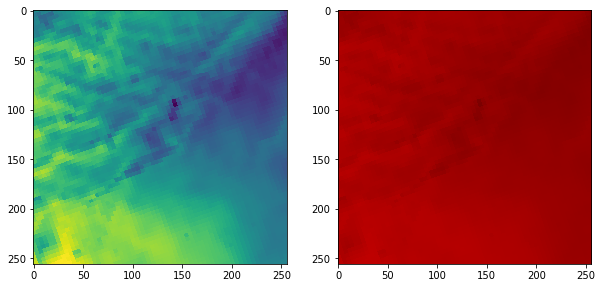

In [34]:
lowres, hires = get_rgb_images(lowres_training_0[0], hires_training_0[0], one_channel_only=0)

show_images(
    lowres_training_0[0,5,:,:], 
    lowres
)

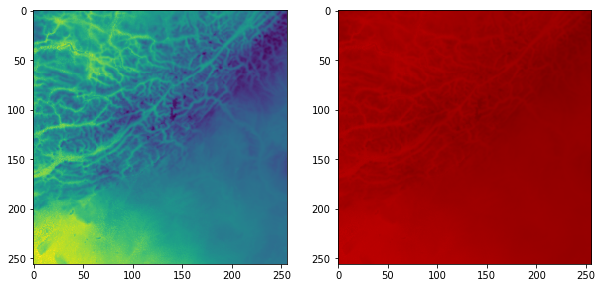

In [35]:
show_images(
    hires_training_0[0,0,:,:], 
    hires
)

### Wind X-axis layer

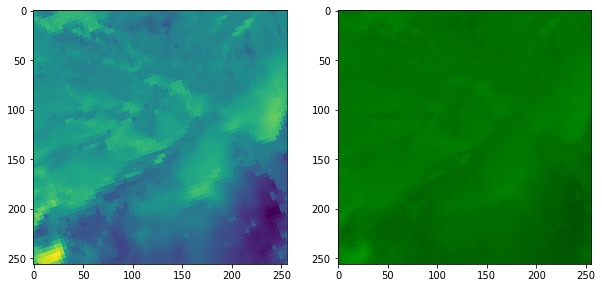

In [30]:
lowres, hires = get_rgb_images(lowres_training_0[0], hires_training_0[0], one_channel_only=1)

show_images(
    lowres_training_0[0,13,:,:], 
    lowres
)

### Wind Y-axis layer

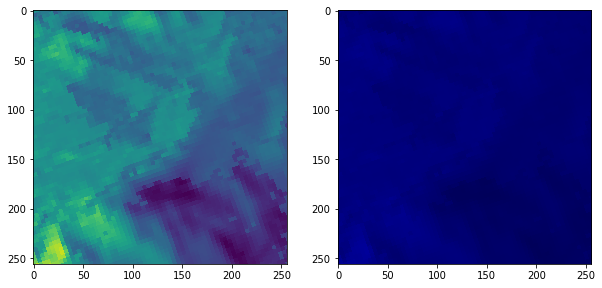

In [31]:
lowres, hires = get_rgb_images(lowres_training_0[0], hires_training_0[0], one_channel_only=2)

show_images(
    lowres_training_0[0,14,:,:], 
    lowres
)

---

## Export all temperatures to rgb images

In [59]:
def export_png_images(lowres_npy_filenames, lowres_dest,
                      hires_npy_filenames, hires_dest,
                      dates):
    """
    Parse every sample from the specified .npy files and save a png image of the temperature.
    Each png file is named by its date.
    
    Arguments
        lowres_npy_filenames : array of string, list of lowres .npy files.
        lowres_dest : string, folder name where to save png image for lowres
        
        hires_npy_filenames : array of string, list of hires .npy files.
        hires_dest : string, folder name where to save png image for hires

        dates : date in chronological order of the given 'source_npy_filenames'
    """
    # create the destination folder
    if not os.path.exists(lowres_dest):
        os.makedirs(lowres_dest)
    if not os.path.exists(hires_dest):
        os.makedirs(hires_dest)
    
    date_index = 0
    
    for lowres_npy_filename, hires_npy_filename in zip(lowres_npy_filenames, hires_npy_filenames):
        lowres_samples = np.load(lowres_npy_filename)
        hires_samples  = np.load(hires_npy_filename)
        
        nb_samples = lowres_samples.shape[0]
        
        for i in range(nb_samples):
            # create a PIL Image of lowres and hires sample
            lowres_image, hires_image = get_rgb_images(lowres_samples[i,:,:,:], hires_samples[i,:,:,:])
            
            # save the PIL Images in dest folder using corresponding date as filename
            filename = dates[date_index].decode('UTF-8')+'.png'
            lowres_image.save(lowres_dest +'/'+ filename, "PNG")
            hires_image.save(hires_dest +'/'+ filename, "PNG")
            
            date_index += 1
            
    return date_index

---

In [60]:
lowres_training_filenames = sorted(glob.glob('../data/input_training_*'))
hires_training_filenames = sorted(glob.glob('../data/label_training_*'))

lowres_test_filenames = sorted(glob.glob('../data/input_test_*.npy'))
hires_test_filenames = sorted(glob.glob('../data/label_test_*.npy'))

date_training = np.load('../data/date_training.npy')
date_test = np.load('../data/date_test_set.npy')

---

In [63]:
test_image_count = export_png_images(lowres_test_filenames, '../images/valid/lowres', 
                                     hires_test_filenames, '../images/valid/hires',
                                     date_test)
test_image_count

248

In [64]:
training_image_count = export_png_images(lowres_training_filenames, '../images/train/lowres', 
                                         hires_training_filenames, '../images/train/hires',
                                         date_training)
training_image_count

5343